In [9]:
#Importer les packages
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Importer les fichiers CSV
resultat_2019 = pandas.read_csv("comptage_velo_2019.csv", delimiter=",", parse_dates=["Date"])
resultat_2020 = pandas.read_csv("comptage_velo_2020.csv", delimiter=",", parse_dates=["Date"])
data_compteurs = pandas.read_csv("localisation_des_compteurs_velo.csv", delimiter=",")

In [11]:
#Diagramme MatPlotLib
#Fonction pour calculer le nombre de vélo qui sont passé à un compteur donné par mois en 2019 et en 2020
def tableau_sum_par_compteur_mois(compteur):
    #Graphique représentant les données analysées
    #Source: Documentation Matplotlib https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    #Définir les étiquettes, les sous-titres des axes, le titre et la légende
    labels = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
    x = np.arange(len(labels))
    plt.xticks(x,labels)
    plt.ylabel("Nombre de passants")
    plt.xlabel("Mois")
    plt.title(("Nombre de passants par mois pour 2019 et 2020 pour le", compteur))
    #Définir les données et les barres du graphique
    donnees_2019 = resultat_2019.groupby(resultat_2019["Date"].dt.month).sum()[compteur]
    donnees_2020 = resultat_2020.groupby(resultat_2020["Date"].dt.month).sum()[compteur]
    width = 0.45
    bar2019 = plt.bar(x - width/2, donnees_2019, width, label='2019')
    bar2020 = plt.bar(x + width/2, donnees_2020, width, label='2020')
    plt.bar_label(bar2019, padding=3)
    plt.bar_label(bar2020, padding=3)
    plt.legend()
    plt.show()

In [12]:
def statistiques_par_compteur(compteur):
    sum_2019 = resultat_2019.groupby(resultat_2019["Date"].dt.day).sum()[compteur]
    sum_2020 = resultat_2020.groupby(resultat_2020["Date"].dt.day).sum()[compteur]
    max_2019 = max(sum_2019)
    max_2020 = max(sum_2020)
    min_2019 = min(sum_2019)
    min_2020 = min(sum_2020)
    difference_max = max_2020-max_2019
    variation_max = round((difference_max / max_2019), 2) * 100
    difference_min = min_2020 - min_2019
    variation_min = round((difference_min / min_2019), 2) * 100
    corr_week_day_2019 = round(resultat_2019["Date"].dt.month.corr(resultat_2019[compteur]), 4)
    corr_week_day_2020 = round(resultat_2020["Date"].dt.month.corr(resultat_2020[compteur]), 4)
    # interprétation du coefficient de variation pour l'année 2019
    explication_2019 = ""
    if corr_week_day_2019 == 0:
        explication_2019 = "la corrélation est nulle"
    elif corr_week_day_2019 <= 0.5:
        explication_2019 = "la corrélation est faible"
    elif corr_week_day_2019 <= 0.75:
        explication_2019 = "la corrélation est moyenne"
    elif corr_week_day_2019 <= 0.85:
        explication_2019 = "la corrélation est très forte"
    elif corr_week_day_2019 == 1:
        explication_2019 = "la corrélation est parfaite"
    # interprétation du coefficient de variation pour l'année 2019
    explication_2020 = ""
    if corr_week_day_2020 == 0:
        explication_2020 = "la corrélation est nulle"
    elif corr_week_day_2020 <= 0.5:
        explication_2020 = "la corrélation est faible"
    elif corr_week_day_2020 <= 0.75:
        explication_2020 = "la corrélation est moyenne"
    elif corr_week_day_2020 <= 0.85:
        explication_2020 = "la corrélation est très forte"
    elif corr_week_day_2020 == 1:
        explication_2020 = "la corrélation est parfaite"
    print("Statistiques sur le nombre de passants dans une journée pour un compteur donnée \n\nMaximum en 2019: "
          + str(max_2019) + "\nMaximum en 2020: " + str(max_2020) + "\nLa différence est de: " + str(difference_max) +
          " passants, ce qui représente une variation de: +" + str(variation_max) + "% \n\nMinimum en 2019: " +
          str(min_2019) + "\nMinimum en 2020: " + str(min_2020) + "\nLa différence est de: " + str(difference_min) +
          " passants, ce qui représente une variation de: +" + str(variation_min) +
          "%\n\nLa corrélation entre le nombre de passants et le jour de la semaine \nEn 2019 " + explication_2019 +
          ": " + str(corr_week_day_2019) + "\nEn 2020 " + explication_2020 + ": " + str(corr_week_day_2020) +"\n")

In [13]:
def resultat_par_compteur(compteur):
    return(tableau_sum_par_compteur_mois(compteur),statistiques_par_compteur(compteur))

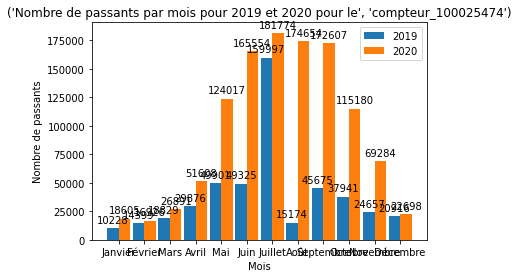

Statistiques sur le nombre de passants dans une journée pour un compteur donnée 

Maximum en 2019: 73300
Maximum en 2020: 43183
La différence est de: -30117 passants, ce qui représente une variation de: +-41.0% 

Minimum en 2019: 662
Minimum en 2020: 22636
La différence est de: 21974 passants, ce qui représente une variation de: +3319.0%

La corrélation entre le nombre de passants et le jour de la semaine 
En 2019 la corrélation est faible: 0.0883
En 2020 la corrélation est faible: 0.1867



(None, None)

In [14]:
#Fonction qui permet d'entrer le compteur de notre choix. Voir le fichier CSV pour sélectionner celui de votre choix. La donnée de base est toujours "compteur_100xxxxx"
resultat_par_compteur("compteur_100025474")

In [15]:
#Nombre total de compteurs disponibles à ce jour
compteur_total = data_compteurs.count()["ID"]
print("Nombre de compteurs disponibles à ce jour: ",compteur_total)
#Tableau de données agrégé à l'aide de Pandas en utilisant un groupby
#Calcul du nombre de compteur disponibles à ce jour selon le statut
compteur_total_par_statut = data_compteurs.groupby(data_compteurs["Statut"]).count()["ID"]
print("Nombre de compteurs disponibles à ce jour selon le statut\n",compteur_total_par_statut)
#Source : Geeksforgeeks for data_actif https://www.geeksforgeeks.org/count-all-rows-or-those-that-satisfy-some-condition-in-pandas-dataframe/
#Nombre total de compteur disponible à ce jour selon leur statut
def proportion_compteur_par_statut (statut):
    data_compteurs = pandas.read_csv("localisation_des_compteurs_velo.csv", delimiter=",")
    data_compteurs = data_compteurs.apply(lambda x : True
                                          if x["Statut"] == statut else False, axis = 1)
    compteur_actif = len(data_compteurs[data_compteurs == True].index)
    print("Pourcentage des compteurs qui sont " + statut + " sur le réseau :",round(compteur_actif/compteur_total,2)*100, "%")


Nombre de compteurs disponibles à ce jour:  46
Nombre de compteurs disponibles à ce jour selon le statut
 Statut
Actif              39
En maintenance      4
Inactif             2
Unidirectionnel     1
Name: ID, dtype: int64


In [8]:
#Fonction qui permet d'obtenir la proportion des compteurs sur le réseau selon le statut.
proportion_compteur_par_statut("En maintenance")

Pourcentage des compteurs qui sont En maintenance sur le réseau : 9.0 %
